

```
YASH AJAY TAPADIYA
Predicting for 0 in the data
```



In [101]:
import sys

assert sys.version_info >= (3, 7)

In [102]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [103]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [104]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [105]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [106]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [107]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [108]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [109]:
X.shape

(70000, 784)

In [110]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

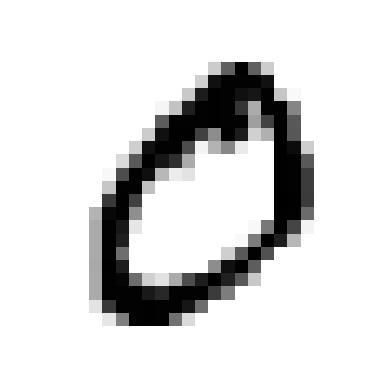

In [111]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[1] # predicting for 0
plot_digit(some_digit)
plt.show()

In [112]:
y[1]

'0'

In [113]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [114]:
y_train_0 = (y_train == '0')  # True for all 3s, False for all other digits
y_test_0 = (y_test == '0')

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_0)

In [ ]:
sgd_clf.predict([some_digit])

In [ ]:
sgd_clf.predict([X[9]])

In [74]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_0, cv=3, scoring="accuracy")

array([0.9854, 0.9847, 0.9865])

In [75]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_0)
print(any(dummy_clf.predict(X_train)))

False


In [76]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3)

In [77]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_0, y_train_pred)
cm

array([[53486,   591],
       [  277,  5646]])

In [78]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_0, y_train_pred)

0.9052429052429053

In [79]:
recall_score(y_train_0, y_train_pred)

0.9532331588721932

In [80]:
from sklearn.metrics import f1_score

f1_score(y_train_0, y_train_pred)

0.9286184210526316

Precision/Recall Trade-off

In [81]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3,
                             method="decision_function")

In [82]:
threshold = 3000

In [83]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores)

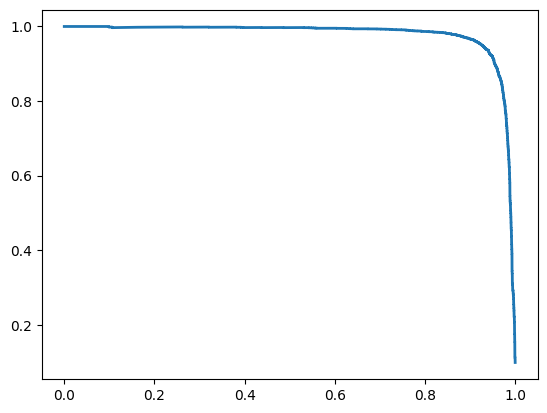

In [84]:
import matplotlib.patches as patches

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

plt.show()

In [85]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

np.float64(-411.0056907752512)

In [86]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [87]:
precision_score(y_train_0, y_train_pred_90)

0.9000636537237429

In [88]:
recall_at_90_precision = recall_score(y_train_0, y_train_pred_90)
recall_at_90_precision

0.9549214924869154

The ROC Curve

In [89]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

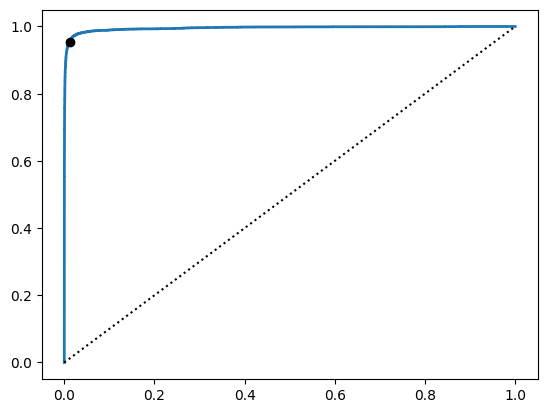

In [90]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")


plt.show()

In [91]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_0, y_scores)

np.float64(0.9951089652363219)

In [92]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [93]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_0, cv=3,
                                    method="predict_proba")

In [94]:
y_probas_forest[:2]

array([[1., 0.],
       [0., 1.]])

In [95]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_0, y_scores_forest)

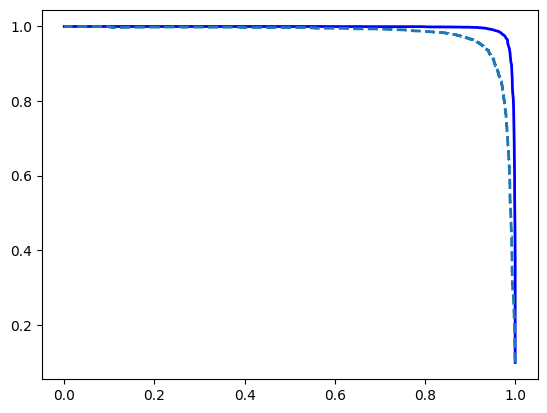

In [96]:

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")


plt.show()

In [97]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba ≥ 50%
f1_score(y_train_0, y_train_pred_forest)

0.9697126585555268

In [98]:
roc_auc_score(y_train_0, y_scores_forest)

np.float64(0.9994553136100529)

In [99]:
precision_score(y_train_0, y_train_pred_forest)

0.9917049064595835

In [100]:
recall_score(y_train_0, y_train_pred_forest)

0.948674658112443